# Preparation and analysis of models
1. Compare correlations from the different services: electricity, natural gas and consumption
2. Calculate correlations between these three services

## 1. Compare factors that have the most impact on the three services consumption

##### Import library

In [16]:
# Import libraries for plotting, reading and wrangling data
library(tidyverse)
library(scales)

##### Read CSV files

In [8]:
ElecCorrDF          <- read_csv("../../curated/correlations/gold_correlations_consumption_electricity.csv",   show_col_types = FALSE) %>% mutate(`Consumption Type` = "Electricity")
NaturalGasCorrDF    <- read_csv("../../curated/correlations/gold_correlations_consumption_natural_gas.csv",   show_col_types = FALSE) %>% mutate(`Consumption Type` = "Natural Gas")
WaterCorrDF         <- read_csv("../../curated/correlations/gold_correlations_consumption_water.csv",         show_col_types = FALSE) %>% mutate(`Consumption Type` = "Water")

##### Combine all three services

In [20]:
GlobalCorrDF <- ElecCorrDF %>% union(NaturalGasCorrDF) %>% union(WaterCorrDF) %>% arrange(variable_two)
GlobalCorrDF

variable_one,variable_two,Hourly,Daily,Monthly,Consumption Type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Consumption,Average Dew Point,-0.117,-0.328,-0.649,Electricity
Consumption,Average Dew Point,-0.354,-0.762,-0.855,Natural Gas
Consumption,Average Dew Point,0.019,0.054,0.093,Water
Consumption,Average Humidex,-0.019,0.016,-0.339,Electricity
Consumption,Average Humidex,-0.029,-0.092,-0.363,Natural Gas
Consumption,Average Humidex,-0.015,0.093,0.311,Water
Consumption,Average Relative Humidity (%),0.117,0.309,0.626,Electricity
Consumption,Average Relative Humidity (%),0.081,0.230,0.535,Natural Gas
Consumption,Average Relative Humidity (%),0.029,0.135,0.283,Water


##### Define potential factors that have a correlation (with 'consumption' variable) higher or equal to 50%

In [21]:
GlobalCorrDF %>% filter((abs(Hourly) >= 0.5) | (abs(Daily) >= 0.5) | (abs(Monthly) >= 0.5))

variable_one,variable_two,Hourly,Daily,Monthly,Consumption Type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Consumption,Average Dew Point,-0.117,-0.328,-0.649,Electricity
Consumption,Average Dew Point,-0.354,-0.762,-0.855,Natural Gas
Consumption,Average Relative Humidity (%),0.117,0.309,0.626,Electricity
Consumption,Average Relative Humidity (%),0.081,0.230,0.535,Natural Gas
Consumption,Average Temperature,-0.162,-0.435,-0.749,Electricity
Consumption,Average Temperature,-0.361,-0.807,-0.891,Natural Gas
Consumption,Average Visibility,-0.114,-0.335,-0.719,Electricity
Consumption,Average Visibility,-0.110,-0.271,-0.697,Natural Gas
Consumption,Average Wind Direction,-0.056,-0.183,-0.506,Electricity


## 2. Calculate correlations between the three services

##### Read CSV files

In [69]:
# Read hourly, daily and monthly electricity consumption data in csv files
ConsElecHourDF  <- read_csv("../../curated/electricity/gold_hourly_electricity.csv",     show_col_types = FALSE) %>% mutate(`Consumption Type` = "Electricity")
ConsElecDayDF   <- read_csv("../../curated/electricity/gold_daily_electricity.csv",      show_col_types = FALSE) %>% mutate(`Consumption Type` = "Electricity")
# Remove last month since it's not a  complete month. This would impact the mean and min max values
ConsElecMonthDF <- read_csv("../../curated/electricity/gold_monthly_electricity.csv",    show_col_types = FALSE) %>%
    mutate(
        month_str = ifelse(nchar(month) == 1, paste0("0", as.character(month)), as.character(month)),
        year_month = factor(paste(year, month_str, sep = "-")),
        `Consumption Type` = "Electricity"
    ) %>% 
    filter(year_month != "2014-04") %>%
    select(-month_str)

# Read hourly, daily and monthly natural_gas consumption data in csv files
ConsNGHourDF  <- read_csv("../../curated/natural_gas/gold_hourly_natural_gas.csv",     show_col_types = FALSE) %>% mutate(`Consumption Type` = "Natural Gas")
ConsNGDayDF   <- read_csv("../../curated/natural_gas/gold_daily_natural_gas.csv",      show_col_types = FALSE) %>% mutate(`Consumption Type` = "Natural Gas")
# Remove last month since it's not a  complete month. This would impact the mean and min max values
ConsNGMonthDF <- read_csv("../../curated/natural_gas/gold_monthly_natural_gas.csv",    show_col_types = FALSE) %>%
    mutate(
        month_str = ifelse(nchar(month) == 1, paste0("0", as.character(month)), as.character(month)),
        year_month = factor(paste(year, month_str, sep = "-")),
        `Consumption Type` = "Natural Gas"
    ) %>% 
    filter(year_month != "2014-04") %>%
    select(-month_str)

# Read hourly, daily and monthly water consumption data in csv files
ConsWaterHourDF  <- read_csv("../../curated/water/gold_hourly_water.csv",     show_col_types = FALSE) %>% mutate(`Consumption Type` = "Water")
ConsWaterDayDF   <- read_csv("../../curated/water/gold_daily_water.csv",      show_col_types = FALSE) %>% mutate(`Consumption Type` = "Water")
# Remove last month since it's not a  complete month. This would impact the mean and min max values
ConsWaterMonthDF <- read_csv("../../curated/water/gold_monthly_water.csv",    show_col_types = FALSE) %>%
    mutate(
        month_str = ifelse(nchar(month) == 1, paste0("0", as.character(month)), as.character(month)),
        year_month = factor(paste(year, month_str, sep = "-")),
        `Consumption Type` = "Water"
    ) %>% 
    filter(year_month != "2014-04") %>%
    select(-month_str)

##### Calculate correlations

In [23]:
# HOUR
electricity_natural_gas_hour_cor    <- cor(ConsElecHourDF$consumption, ConsNGHourDF$consumption)
electricity_water_hour_cor          <- cor(ConsElecHourDF$consumption, ConsWaterHourDF$consumption)
natural_gas_water_hour_cor          <- cor(ConsNGHourDF$consumption, ConsWaterHourDF$consumption)
# DAY
electricity_natural_gas_day_cor     <- cor(ConsElecDayDF$consumption, ConsNGDayDF$consumption)
electricity_water_day_cor           <- cor(ConsElecDayDF$consumption, ConsWaterDayDF$consumption)
natural_gas_water_day_cor           <- cor(ConsNGDayDF$consumption, ConsWaterDayDF$consumption)
# MONTH
electricity_natural_gas_month_cor   <- cor(ConsElecMonthDF$consumption, ConsNGMonthDF$consumption)
electricity_water_month_cor         <- cor(ConsElecMonthDF$consumption, ConsWaterMonthDF$consumption)
natural_gas_water_month_cor         <- cor(ConsNGMonthDF$consumption, ConsWaterMonthDF$consumption)

##### Display correlation results

In [39]:
# define columns one by one
time_frame      <- c(rep("Hourly", 3), rep("Daily", 3), rep("Monthly", 3))
first_variable  <- c(rep(c("Electricity", "Electricity", "Natural Gas"), 3))
second_variable <- c(rep(c("Natural Gas", "Water", "Water"), 3))
correlation     <- c(electricity_natural_gas_hour_cor, electricity_water_hour_cor, natural_gas_water_hour_cor, electricity_natural_gas_day_cor, electricity_water_day_cor, natural_gas_water_day_cor, electricity_natural_gas_month_cor, electricity_water_month_cor, natural_gas_water_month_cor)
# Create Data Frame from columns above
AllServicesCorrDF <- data.frame(time_frame, first_variable, second_variable, correlation)
# Pivot data in order to make it more visually insighful
AllServicesCorrPivotDF <- AllServicesCorrDF %>%
    pivot_wider(names_from = time_frame, values_from = correlation)

##### Filter for relationships that have a correlation (with 'consumption' variable) higher or equal to 50%

In [40]:
AllServicesCorrPivotDF %>% filter((abs(Hourly) >= 0.5) | (abs(Daily) >= 0.5) | (abs(Monthly) >= 0.5))

first_variable,second_variable,Hourly,Daily,Monthly
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Electricity,Natural Gas,0.2409056,0.2232095,0.5752600
Natural Gas,Water,0.6305817,0.2191482,0.1796697


##### Vizualisation of monthly electricity and natural gas consumption (scaled)

In [75]:
# Define plot title
base_title_month        <- ggtitle("Comparison of monthly electricity and natural consumption")
# Define plot theme
base_theme_month        <- theme_light() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"),
        axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)
    )

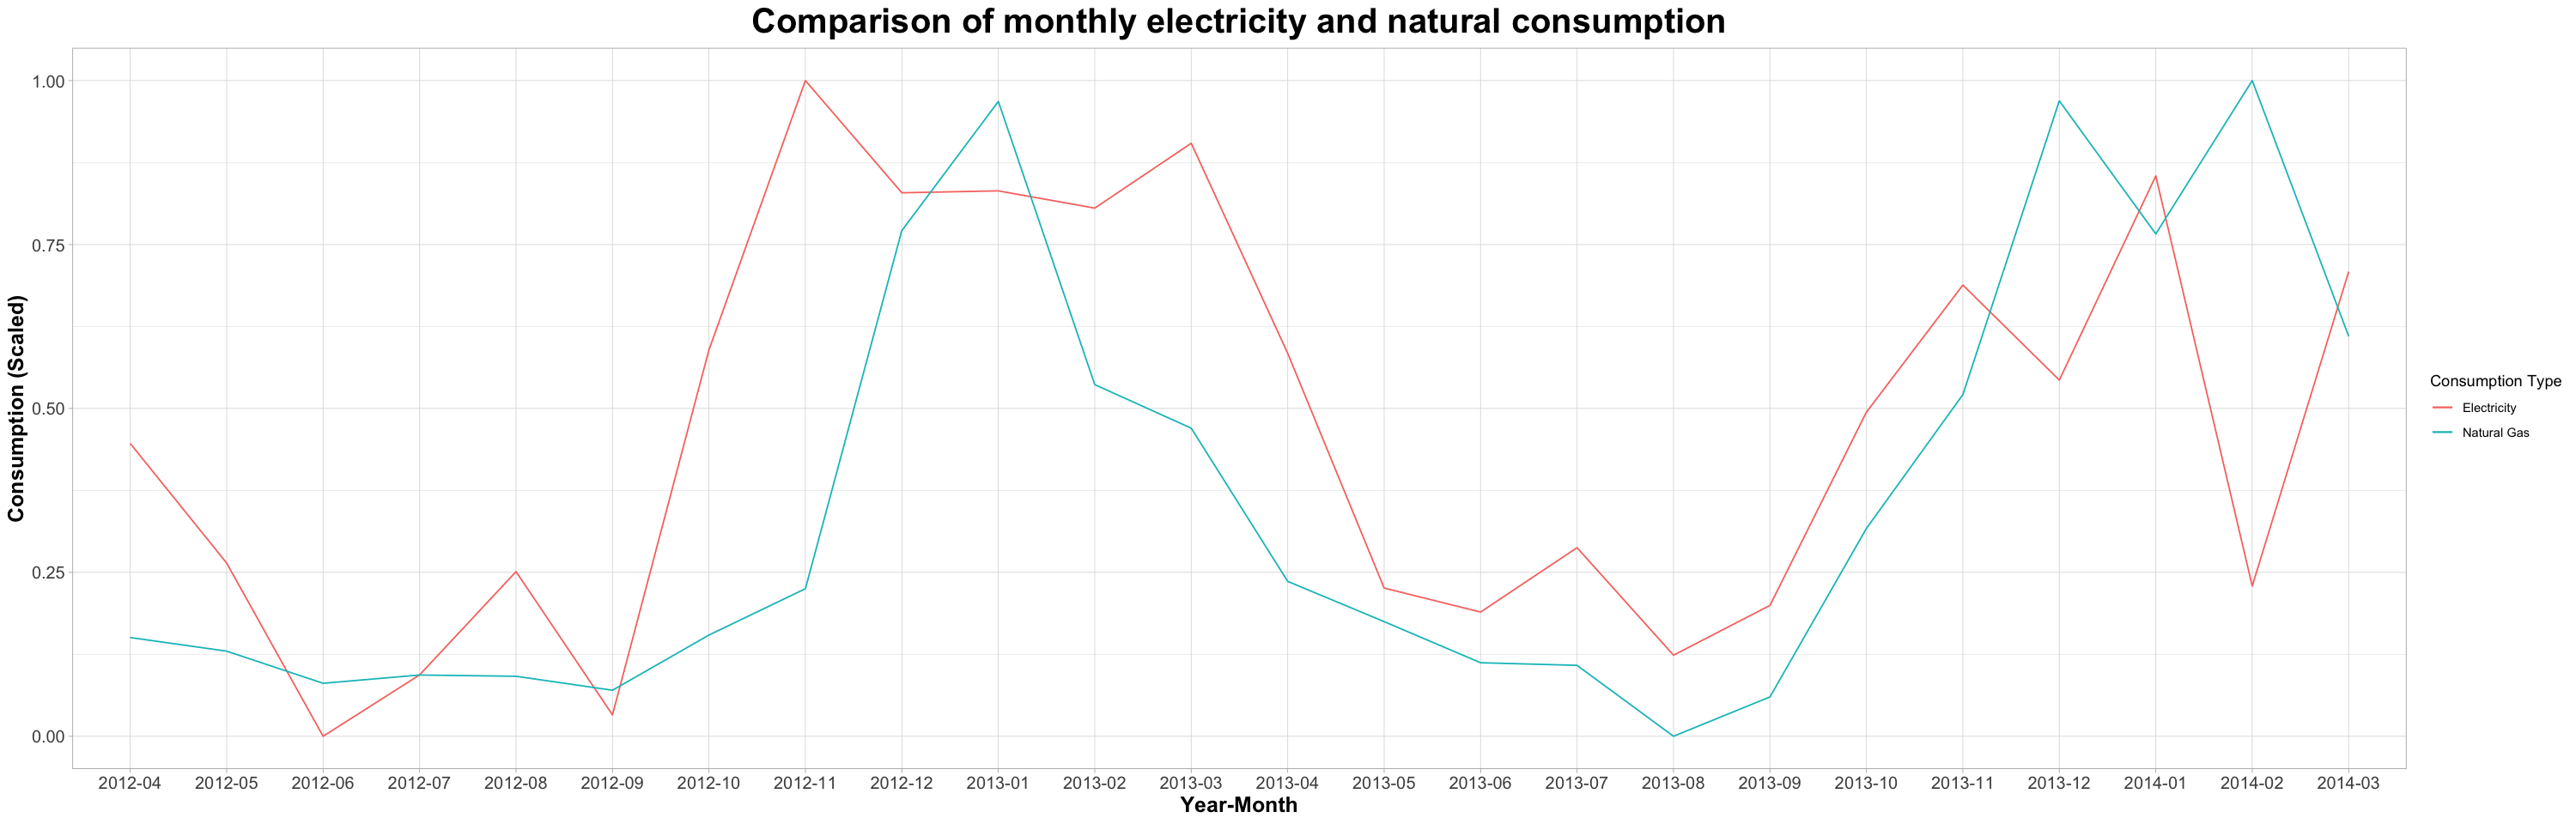

In [78]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
ggplot(ConsElecMonthDF, aes(x = year_month, y = rescale(consumption), group = 1, color = `Consumption Type`)) +
    geom_line() +
    geom_line(data=ConsNGMonthDF) +
    labs(x = "Year-Month", y = "Consumption (Scaled)") +
    base_title_month +
    base_theme_month